# PS1: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

In [ ]:
#### Write your name

- Brigid Kelly


###  Simple Linear Regression example

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

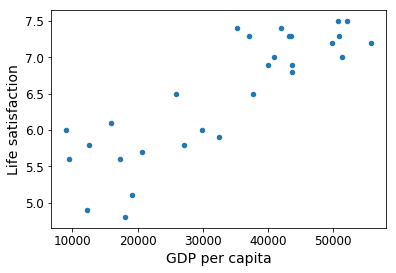

In [7]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


### Plot scatterplot and the regression function

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

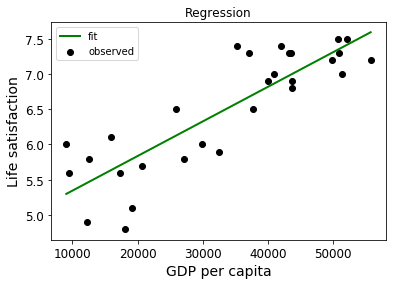

In [9]:
# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Model Evaluation Example

#### 1. Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

#### 2. Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3. Linear regression in scikit-learn

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4. Making predictions

In [13]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### 5. Computing the RMSE for our Sales predictions

In [14]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4198326061843324


### Assignment


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(c) Draw scatter plots

(d) simple linear regression function with a scatter plot

Uploading confirmed case data..

In [353]:
datapath = "datasets\\csse_covid_19_data\\csse_covid_19_time_series\\"
filename = "time_series_covid19_confirmed_us.csv"
covid_df = pd.read_csv(datapath + filename )

I believe an interesting metric to look at would be to assume that many, many cases of COVID19 are asymptomatic and not reported.  Reports from the University of Southern California claim numbers may be many times higher than actually indicated through testing (https://content.govdelivery.com/accounts/CALACOUNTY/bulletins/2877402?reqfrom=share).  Looking at these numbers and calculating the death rate per case (case fatality rate or CFR) with the adjusted values may show that, while it is still a very serious virus, SARS-2-CoV may not be as deadly as initially thought.

I will compare this with the death rate of actual confirmed cases, which are usually due to clinical presentation of symptoms.  This may show that while the virus is not as deadly as we once thought, those who develop symtoms of the virus are possibly in more danger by an order of magnitude or more.  

As of 21APR2020, there are 13,823 confirmed cases of COVID19 in Los Angeles County.  
The initial study has shown that between 2.8 and 5.6 percent of the population of LA County has already been exposed to and had the virus.  The following code block demonstrates the difference in confirmed cases and what they possibly could be. 

In [354]:
total_confirmed_LA = 13823
LA_population = 10000000 #approximately
confirmed_pop_percent = total_confirmed_LA/LA_population
estimated_pop_percent = (2.8+5.6)/(2*100)  #This is to get the mean of the confidence interval
percent_diff_factor = estimated_pop_percent / confirmed_pop_percent
estimated_infected_LA = total_confirmed_LA * percent_diff_factor

print("Initial antibody testing shows the number of actual infected individuals \nis approximately " + str(round(percent_diff_factor,2)) + " times greater than the amount of confrimed cases.\n")
print("Study estimated total infected in LA County: " + str(int(estimated_infected_LA)) )


Initial antibody testing shows the number of actual infected individuals 
is approximately 30.38 times greater than the amount of confrimed cases.

Study estimated total infected in LA County: 420000


In [355]:
covid_df.head()
#the head does not yeild much insight into the meanings of some of the data, try the tail

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,133,133,133,133,135,135,136,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,13,13,13,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,788,897,903,923,974,1043,1068,1118,1213,1252
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,51,51,51,51,53,53,53


In [356]:
covid_df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,15,17
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,6,7
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,0,0,0,0,0,0,0,0,66,70
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,10,10
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,0,0,0,0,0,0,0,0,119,124


It can be seen that the data in Admin2 seems to correspond to county, or locality, this may be a way to look up Los Angeles.

In [357]:
#Getting data that only corresponds to Los Angeles
la_data = covid_df.loc[covid_df['Admin2'] == 'Los Angeles']
la_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
209,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,8453,8894,9433,10047,10517,10854,11400,12021,12341,13823


In order to filter out only the dates and numerical data, pandas allows you to select a row and the numerical integer locations of columns to place into a new series.  This series is now iterable.  

Additionally, a series with the adjusted numbers can also be created.

In [358]:

la_confirmed_numerical_df = la_data.iloc[:, 12:]
print("Original data: ")
la_confirmed_numerical = np.copy(la_confirmed_numerical_df.iloc[0,:])


la_test_numerical = np.copy(la_confirmed_numerical * round(percent_diff_factor))

print(la_confirmed_numerical[60:65] )
print("\nAdjusted data: ")
print(la_test_numerical[60:65])

Original data: 
[ 536  662  812 1229 1465]

Adjusted data: 
[16080 19860 24360 36870 43950]


Now to get the deaths in a same manner, as it is laid out the same as the confirmed case data.

In [359]:
deaths_filename = "time_series_covid19_deaths_US.csv"
us_deaths_df = pd.read_csv(datapath + deaths_filename)

la_deaths_df = us_deaths_df.loc[us_deaths_df["Admin2"] == "Los Angeles"]
la_deaths_numerical = np.copy(la_deaths_df.iloc[0, 12:])
print(la_deaths_numerical[60:65])

[5 7 11 13 21]


Random side note, all of the numbers I picked to show in deaths are sequential prime numbers.

A third series can now be created by calculating the respective death rates. 

In [360]:
#this is a hacky way to populate an array with the dates as indices:
#We must remember that assigning a variable to another variable in python will
#create a reference to that very same object in memory..  Because of this we need
#to use np.copy in order to get a fresh deep copy of the array.

la_conf_cfr = np.copy(la_deaths_numerical)
la_test_cfr = np.copy(la_conf_cfr)

#check to make sure theyre not the same thing
la_conf_cfr is la_deaths_numerical
la_test_cfr is la_conf_cfr


False

In [361]:
print(la_deaths_numerical)
print(la_confirmed_numerical)
print(la_test_numerical)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 5 7 11 13 21 26 26 32 44 54
 64 78 89 93 132 147 169 198 223 242 244 269 322 360 405 457 497 576 600
 619]
[    0     0     0     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     7    11    13    14    14    14    20
    27    32    40    53    53    94   144   190   231   292   292   407
   536   662   812  1229  1465  1465  1829  2474  3019  3518  4045  4566
  4605  5955  6377  6936  7559  7955  8443  8453  8894  9433 10047 10517
 10854 11400 12021 12341 13823]
[     0      0      0     30     30     30     30     30     30     30
     30     30     30     30     30     30     30     30     30     30
     30     30     30     30     30     30     30     30     30     30
     30     30 

In [362]:
la_conf_cfr = np.divide(la_deaths_numerical, la_confirmed_numerical)

ValueError: operands could not be broadcast together with shapes (90,) (89,) 

In [363]:
##Looks like there's a size mismatch, we can find which one it is by checking the shapes

print(len(la_deaths_numerical))
print(len(la_test_numerical))
print(len(la_confirmed_numerical))

90
89
89


In [364]:
#since the numbers at the beginning of the deaths data is all 0's, the array can just be shifted left one 
#element to correct the size mismatch

la_deaths_numerical = np.roll(la_deaths_numerical,-1)
la_deaths_numerical = np.delete(la_deaths_numerical, -1)
print(len(la_deaths_numerical))
la_deaths_numerical

89


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 5, 7, 11, 13, 21, 26,
       26, 32, 44, 54, 64, 78, 89, 93, 132, 147, 169, 198, 223, 242, 244,
       269, 322, 360, 405, 457, 497, 576, 600, 619], dtype=object)

In [365]:
#now try again:
np.seterr(divide= 'warn')
la_conf_cfr = np.divide(la_deaths_numerical, la_confirmed_numerical)
la_conf_cfr = np.copy(np.nan_to_num(la_conf_cfr, 0))
la_conf_cfr = np.nan_to_num(la_conf_cfr)#this doesnt work because conf_cfr was declared as inexact..
#instead, I will just hardcore the first 3 values of the array, since those are shown as nan
la_conf_cfr[0:3] = 0.0
la_conf_cfr

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037037037037037035,
       0.03125, 0.025, 0.018867924528301886, 0.018867924528301886,
       0.010638297872340425, 0.006944444444444444, 0.005263157894736842,
       0.008658008658008658, 0.00684931506849315, 0.00684931506849315,
       0.012285012285012284, 0.013059701492537313, 0.01661631419939577,
       0.01600985221674877, 0.01708706265256306, 0.017747440273037544,
       0.017747440273037544, 0.017495899398578457, 0.01778496362166532,
       0.017886717456111294, 0.018192154633314382, 0.019283065512978988,
       0.019491896627244855, 0.020195439739413682, 0.02216624685138539,
       0.02305159165751921, 0.02436562860438293, 0.02619394099748644,
       0.028032683846637336, 0.02866279758379723, 0.02886549154146456

In [366]:

#now for the new estimates:

la_test_cfr = np.true_divide(la_deaths_numerical, la_test_numerical)
la_test_cfr[0:3] = 0.0
la_test_cfr

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012345679012345679,
       0.0010416666666666667, 0.0008333333333333334,
       0.0006289308176100629, 0.0006289308176100629,
       0.0003546099290780142, 0.0002314814814814815,
       0.00017543859649122806, 0.0002886002886002886,
       0.00022831050228310502, 0.00022831050228310502,
       0.0004095004095004095, 0.00043532338308457713,
       0.000553877139979859, 0.0005336617405582923, 0.0005695687550854353,
       0.0005915813424345848, 0.0005915813424345848,
       0.0005831966466192819, 0.0005928321207221773,
       0.0005962239152037098, 0.0006064051544438127,
       0.0006427688504326329, 0.0006497298875748285,
       0.0006731813246471227, 0.0007388748950461797,
       0.0007683863885839736, 0.000812187620146

Since so many of the first elements are 0, many of them can be deleted.

In [367]:
#since this was all transferred into numpy arrays, an x value for the charts must be created,
#so it will contain 89 dates starting from 22JAn2020

import datetime

start_date = datetime.datetime.strptime("22-01-2020", "%d-%m-%Y")
end_date = datetime.datetime.strptime("20-04-2020", "%d-%m-%Y")
covid_date_range = [start_date + datetime.timedelta(days=x) for x in range(0, (end_date-start_date).days)]


Finally we can start visualizing the data:

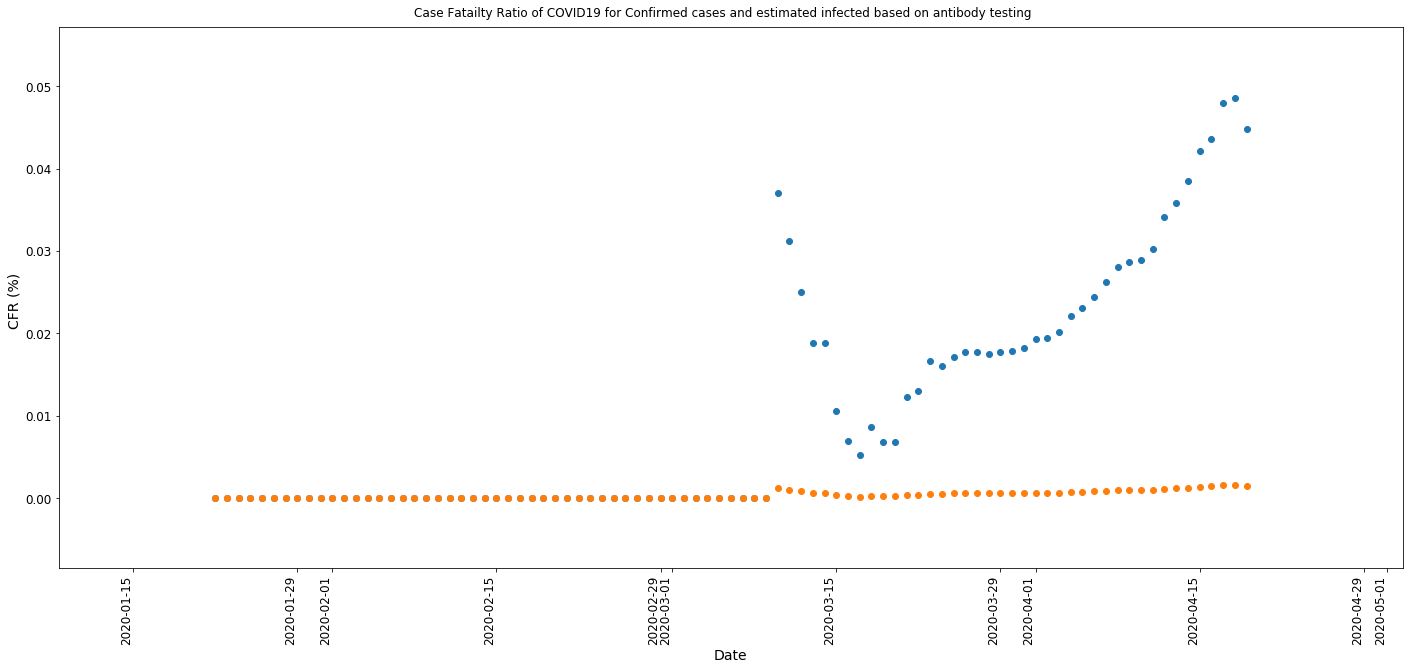

In [368]:
import matplotlib.ticker as ticker
import matplotlib.dates as dates

fig, ax = plt.subplots(figsize = (20,10))
fig.suptitle('Case Fatailty Ratio of COVID19 for Confirmed cases and estimated infected based on antibody testing')
fig.tight_layout(pad=3.0)
fig.autofmt_xdate(rotation = 90)

ax.set_xlabel("Date")
ax.set_ylabel("CFR (%) ")

ax.scatter(covid_date_range, la_conf_cfr)
ax.scatter(covid_date_range, la_test_cfr)

#plt.legend(("Confirmed Cases", "Adjusted Cases"))




In the above plot, it can be seen that the calculated death rate accounting for the antibody-test study remains relatively constant and somewhat linear.  It is also dramatically lower than what the current "confirmed" case fatality rate estimates.

Below is a boxplot of the data, showing the range of where the CFR may actually lie.

In [369]:
la_conf_cfr = np.where(la_conf_cfr == 0.0, 0.000001, la_conf_cfr)
print(la_conf_cfr)
la_test_cfr = np.where(la_conf_cfr == 0.0, 0.000001, la_test_cfr)
print(la_test_cfr)

[1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06
 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06
 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06
 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06 1e-06
 0.037037037037037035 0.03125 0.025 0.018867924528301886
 0.018867924528301886 0.010638297872340425 0.006944444444444444
 0.005263157894736842 0.008658008658008658 0.00684931506849315
 0.00684931506849315 0.012285012285012284 0.013059701492537313
 0.01661631419939577 0.01600985221674877 0.01708706265256306
 0.017747440273037544 0.017747440273037544 0.017495899398578457
 0.01778496362166532 0.017886717456111294 0.018192154633314382
 0.019283065512978988 0.019491896627244855 0.020195439739413682
 0.02216624685138539 0.02305159165751921 0.02436562860438293
 0.02619394099748644 0.028032683846637336 0.02866279758379723
 0.028865491541464568 0.030245109062289183 0.03413548181914555
 0.035831591519856675 0

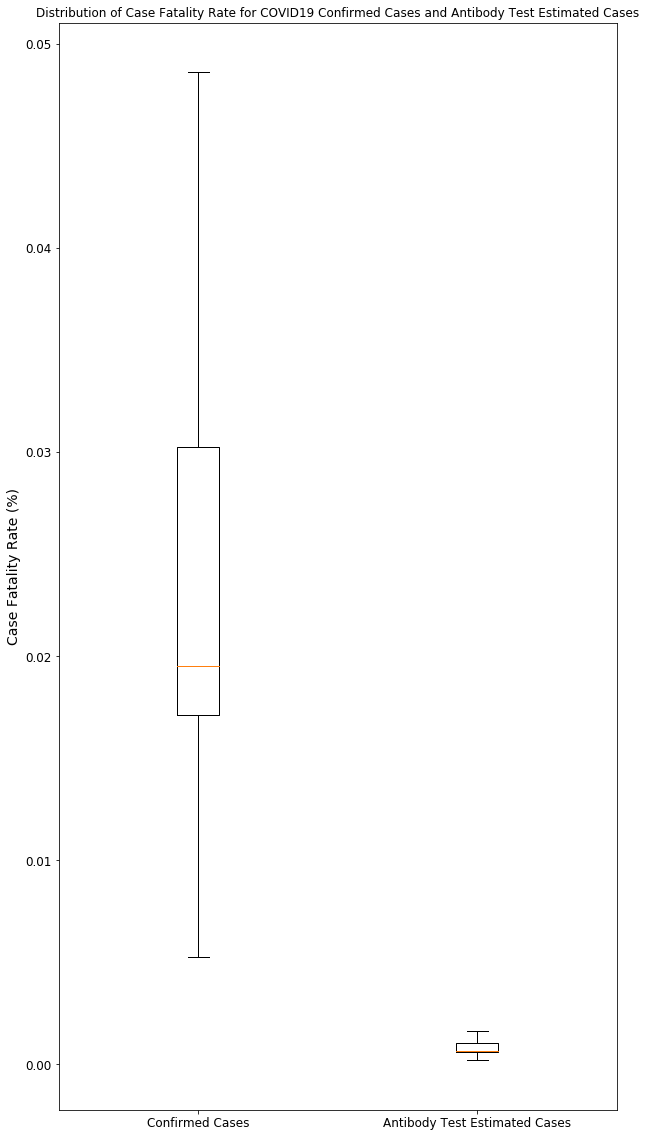

In [383]:
#We need to get rid of the time before cases began to pop up.

box_plot_cfr_data = [la_conf_cfr[12*4:], la_test_cfr[12*4:]]

box_fig, box_ax = plt.subplots(figsize=(10,20))
box_ax.set_title("Distribution of Case Fatality Rate for COVID19 Confirmed Cases and Antibody Test Estimated Cases" )
box_ax.set_ylabel("Case Fatality Rate (%)")

box_ax.boxplot(box_plot_cfr_data, labels=["Confirmed Cases", "Antibody Test Estimated Cases"])

plt.show()

In [391]:
#We could also look at the mean of the CFRs to compare them numerically.

print("Mean Estimated CFR with cases counted solely through the \"confirmed\" metric", la_conf_cfr.mean())
print("Mean Estimated CFR with number of cases adjusted for antibody test results: ", la_test_cfr.mean())
print("Magnitude of difference between estimated case fatality rates when accounting for antibody testing", la_conf_cfr.mean()/la_test_cfr.mean())

Mean Estimated CFR with cases counted solely through the "confirmed" metric 0.010834065456233121
Mean Estimated CFR with number of cases adjusted for antibody test results:  0.0003611175376796807
Magnitude of difference between estimated case fatality rates when accounting for antibody testing 30.001493491139104


### Part 2: Write a summary of what you find from the data

Antibody testing will allow us to see the real numbers of cases and fatality rates.  Based on the initial findings, the CFR may be significantly lower than initially estmated.